In [39]:

import warnings
import sys
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import sys

In [40]:
tech_tickers = ["AAPL","AMZN","TSLA", "NVDA", "MSFT", "GOOG","INTC", "DELL"]

In [41]:

class Returns_analysis():
    individual_stock_data = pd.DataFrame()
    closing_stock_data = pd.DataFrame()
    
   
    def __init__(self,tickers : list,start_date):
            self.tickers = tickers
            self.start_date = start_date
           
    
    def individual_data(self,stock_dict):
        yf.pdr_override()
        if type(stock_dict) != dict:
                raise TypeError(f"Data type should be of type dictionary")
        for ticks in self.tickers:
                Returns_analysis.individual_stock_data = pdr.DataReader(ticks, self.start_date)
                stock_dict.update({f"{ticks}_stock" : Returns_analysis.individual_stock_data})
        


    def download_stocks_closing(self,fill_method, column_name: str):
          yf.pdr_override()
          self.column_name = column_name
          for ticks in self.tickers:
                Returns_analysis.closing_stock_data[ticks] = pdr.DataReader(ticks, self.start_date)[column_name]
          return Returns_analysis.closing_stock_data


    def fill_values(self, fill_method : str): 
        valid_fill_methods = ["linear", "forward", "backward"]
        if fill_method not in valid_fill_methods:
                raise ValueError(f"Invalid fill method. Choose one of the fill methods {valid_fill_methods}")
        elif fill_method == "forward":
                Returns_analysis.closing_stock_data.fillna(method= "ffill", inplace= True)
        elif fill_method == "backward":
                Returns_analysis.closing_stock_data.fillna(method = "bfill", inplace= True)
        else:
                Returns_analysis.closing_stock_data.interpolate(method= "linear", inplace = True)
        return Returns_analysis.closing_stock_data


    def get_returns(self,return_type):
           self.return_type = return_type
           if return_type == "Log":
                returns_data = np.log(Returns_analysis.closing_stock_data/Returns_analysis.closing_stock_data.shift(1))
           else: 
                returns_data = (Returns_analysis.closing_stock_data/Returns_analysis.closing_stock_data.shift(1))-1
           return returns_data

    def normalization(self):
            normalized_data = (Returns_analysis.closing_stock_data/Returns_analysis.closing_stock_data.iloc[0]*100)
            normalized_figure = normalized_data.plot(figsize = (19,6))
            plt.title("Growth Comparison of Stocks")
            return normalized_figure
    
    def individual_return(self):
            individual_return = self.get_returns(self.return_type).mean()*250*100

            print(f"The {self.return_type} return of the stocks are {round(individual_return,2)}")
        

    def portfolio_return(self,weights = list):
            import sys
            weights = np.array(weights)
            self.weights = weights
            if round(sum(weights),2)!= 1 :
                raise ValueError(f"Sum of the weight of the porfolio should be 1,The sum of your weights are {sum(weights)}")
                if len(weights) != Returns_Analysis.closing_stock_data.shape[1]:
                    sys.exit("The weights of individual security does not match the no. of securities")
            annual_returns = np.dot(self.get_returns(self.return_type).mean()*250, weights)

            print(f"The annual returns of the portfolio is {round(annual_returns, 2)}% ")


    def individual_risk_factor(self):
                risk_factor = pd.DataFrame(np.sqrt(self.get_returns(self.return_type).var()*250))
                print(risk_factor)

                print(f"The lowest risk factor is{risk_factor.min()}")

    def portfolio_variance(self):
        if self.weights is None:
            raise ValueError("Weights are not specified")
        returns = self.get_returns(self.return_type)
        cov_matrix = np.cov(returns.T)
        portfolio_variance = np.dot(self.weights.T, np.dot(cov_matrix, self.weights))
        print(f"The portfolio variance is {round(portfolio_variance, 2)}")

In [42]:
securities = Returns_analysis(tech_tickers, start_date = "2010-1-1")

In [43]:
securities.download_stocks_closing(column_name = "Adj Close", fill_method = "forward")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,AMZN,TSLA,NVDA,MSFT,GOOG,INTC,DELL
Date,,,,,,,,
2010-01-04,6.515213,6.695000,NaN,4.242309,23.683071,15.610239,14.020263,NaN
2010-01-05,6.526477,6.734500,NaN,4.304258,23.690722,15.541497,14.013552,NaN
2010-01-06,6.422664,6.612500,NaN,4.331791,23.545334,15.149715,13.966543,NaN
2010-01-07,6.410789,6.500000,NaN,4.246898,23.300472,14.797037,13.832245,NaN
2010-01-08,6.453413,6.676000,NaN,4.256076,23.461161,14.994298,13.986689,NaN
...,...,...,...,...,...,...,...,...
2023-01-31,144.289993,103.129997,173.220001,195.369995,247.809998,99.870003,28.260000,40.619999
2023-02-01,145.429993,105.150002,181.410004,209.429993,252.750000,101.430000,29.070000,41.230000
2023-02-02,150.820007,112.910004,188.270004,217.089996,264.600006,108.800003,30.190001,42.419998


In [44]:
securities.fill_values("backward")

,AAPL,AMZN,TSLA,NVDA,MSFT,GOOG,INTC,DELL
Date,,,,,,,,
2010-01-04,6.515213,6.695000,1.592667,4.242309,23.683071,15.610239,14.020263,11.683000
2010-01-05,6.526477,6.734500,1.592667,4.304258,23.690722,15.541497,14.013552,11.683000
2010-01-06,6.422664,6.612500,1.592667,4.331791,23.545334,15.149715,13.966543,11.683000
2010-01-07,6.410789,6.500000,1.592667,4.246898,23.300472,14.797037,13.832245,11.683000
2010-01-08,6.453413,6.676000,1.592667,4.256076,23.461161,14.994298,13.986689,11.683000
...,...,...,...,...,...,...,...,...
2023-01-31,144.289993,103.129997,173.220001,195.369995,247.809998,99.870003,28.260000,40.619999
2023-02-01,145.429993,105.150002,181.410004,209.429993,252.750000,101.430000,29.070000,41.230000
2023-02-02,150.820007,112.910004,188.270004,217.089996,264.600006,108.800003,30.190001,42.419998


<AxesSubplot: title={'center': 'Growth Comparison of Stocks'}, xlabel='Date'>

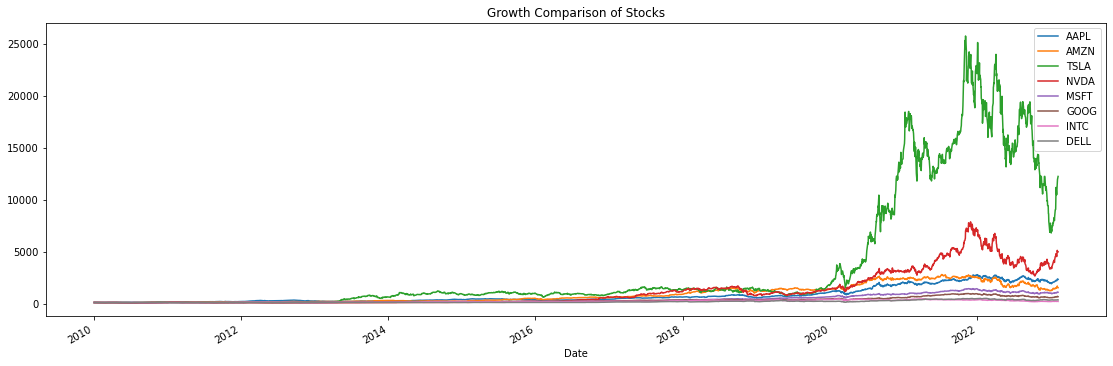

In [45]:
securities.normalization()

In [46]:
dicts = {}
securities.individual_data(stock_dict= dicts)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [47]:
dicts["AAPL_stock"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526475,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410791,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453413,447610800
...,...,...,...,...,...,...
2023-01-31,142.699997,144.339996,142.279999,144.289993,144.289993,65874500
2023-02-01,143.970001,146.610001,141.320007,145.429993,145.429993,77663600
2023-02-02,148.899994,151.179993,148.169998,150.820007,150.820007,118339000
